In [5]:
import sys,os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import torch
import imageio
import numpy as np

sys.path.append('../')

from model.main import DepthNetModule
import matplotlib.pyplot as plt
import cv2
import os

from utils.io import prepare_input_image

In [6]:
# Load the model checkpoint
model_path = 'checkpoints/NYUBestScaleInv10Full.ckpt'
model = DepthNetModule.load_from_checkpoint(model_path)
model.eval()
model = model.to('cuda')

FileNotFoundError: [Errno 2] No such file or directory: '/home/ashkanganj/workspace/HybridDepth/server/checkpoints/NYUBestScaleInv10Full.ckpt'

In [ ]:
data_dir = 'focal stack images directory'

# Load the focal stack images
focal_stack, rgb_img, focus_dist = prepare_input_image(data_dir)

In [5]:
# Disable gradient computation for inference (reduces memory usage and speeds up computation)
with torch.no_grad():
   out = model(rgb_img, focal_stack, focus_dist)

/home/ashkanganj/anaconda3/envs/torch/lib/python3.10/site-packages/torch/nn/functional.py:3769: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [6]:
metric_depth = out[0].squeeze().cpu().numpy()

rel_depth = out[1].squeeze().cpu().numpy() 
scale_map = out[4].squeeze().cpu().numpy()

rgb_img = rgb_img.squeeze().cpu()
rgb_img = rgb_img.permute(1, 2, 0).numpy()

In [7]:
arcore_depth = np.load('./depth_img.npy')

# resize it to 480 x 640
arcore_depth = cv2.resize(arcore_depth, (640, 480))

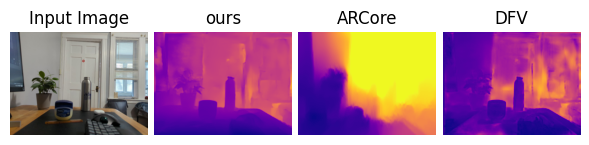

In [12]:
plt.figure(figsize=(6, 3))  
plt.subplot(1, 4, 1)  
plt.imshow(rgb_img)
plt.title('Input Image')
plt.axis('off') 

plt.subplot(1, 4, 2)  
plt.imshow(metric_depth, cmap='plasma',vmax=2.5)
plt.title('ours')
# plt.colorbar() 
plt.axis('off')

# Display the scale map
plt.subplot(1, 4, 3)
plt.imshow(arcore_depth, cmap='plasma',vmax=2.5)
plt.title('ARCore')
# plt.colorbar() 
plt.axis('off')


# Display the scale map
plt.subplot(1, 4, 4)
plt.imshow(scale_map, cmap='plasma', vmax=2.5)
plt.title('DFV')
# plt.colorbar() 
plt.axis('off')
# Show the plot
# plt.show()
plt.tight_layout()
# Adjust subplot parameters to reduce gaps.
plt.subplots_adjust(wspace=0.05, hspace=0)

plt.savefig('depth_comparison.pdf', format='pdf', dpi=100, bbox_inches='tight')